In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels
import random
plt.style.use('dark_background')

Gewichtsvektor am Ende des Trainings:
[-1.  1.  1.]
Auswertung am Ende des Trainings:
[1 0 0]: 0 -> 0
[1 0 1]: 1 -> 1
[1 1 0]: 1 -> 1
[1 1 1]: 1 -> 1


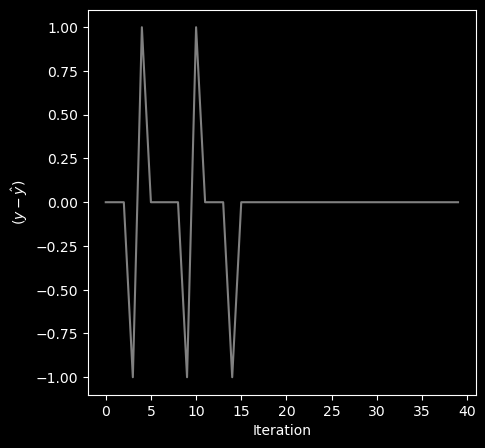

In [2]:
heaviside = lambda x: 0 if x < 0 else 1

def fit(iterations, training_data_set, w):
    
    errors = []
    weights = []
    
    for i in range(iterations):
        training_data = random.choice(training_data_set)
        x = training_data[0] 
        y = training_data[1] 
        y_hat = heaviside(np.dot(w, x))
        error = y - y_hat      
        errors.append(error)    
        weights.append(w)        
        w += error * x        
    
    return errors, weights


def main():
    
    np.random.seed(12)
        
    training_data_set = [(np.array([1,0,0]), 0),
                         (np.array([1,0,1]), 1),
                         (np.array([1,1,0]), 1),
                         (np.array([1,1,1]), 1)]  
  
    w = np.zeros(3)
    iterations = 40
    errors, weights = fit(iterations, training_data_set, w) 
    w = weights[iterations-1]
    print("Gewichtsvektor am Ende des Trainings:")
    print(w)    
    print("Auswertung am Ende des Trainings:")
    for x, y in training_data_set:
        y_hat2 = heaviside(np.dot(x, w))
        print("{}: {} -> {}".format(x, y, y_hat2))
    
    plt.figure(figsize=(5,5))    
    plt.plot(errors,color='grey')    
    plt.xlabel('Iteration')    
    plt.ylabel(r"$(y - \hat y)$") 
    plt.show()    

main()

In [3]:
class PerceptronEstimator(BaseEstimator, ClassifierMixin):

    def __init__(self, n_iterations=20, random_state=None):
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.errors = []

    heaviside = lambda self, x: 0 if x < 0 else 1    

    def fit(self, X=None, y=None):
        random_state = check_random_state(self.random_state)  #random seed
        self.w = random_state.random_sample(np.size(X,1))     #initialize weights     
        X, y = check_X_y(X, y)                                #compatibility check/adjustment 
        self.classes_ = unique_labels(y)                      #returns sorted array of labels
        self.X_ = X                                           #(np.unique)
        self.y_ = y      
        for i in range(self.n_iterations):
            rand_index = random_state.randint(0,np.size(X,0)) #0 to excluded
            x_ = X[rand_index]                                #randomly choose one observation
            y_ = y[rand_index]                                #and corresponding target
            y_hat = self.heaviside(np.dot(self.w, x_))        #act function
            error = y_ - y_hat                                #calc err
            self.errors.append(error)                         #save error for visualization
            self.w += error * x_                              #adjust weights
        return self                                           
    
    def predict(self, x):
        check_is_fitted(self, ['X_', 'y_'])
        y_hat = self.heaviside(np.dot(self.w,x))
        return y_hat
    
    def plot(self):                 
        fignr = 1
        plt.figure(fignr,figsize=(5,5),facecolor='grey')
        plt.axes().set_facecolor('grey')    
        plt.plot(self.errors,color='black')
        plt.style.use('seaborn-whitegrid')     
        plt.xlabel('Iteration')
        plt.ylabel(r"$(y - \hat y)$")
        
    def predict(self, x):
        check_is_fitted(self, ['X_', 'y_'])
        y_hat = self.heaviside(np.dot(self.w,x))
        return y_hat
    
    def plot(self):                 
        fignr = 1
        plt.figure(fignr,figsize=(5,5))    
        plt.plot(self.errors)
        plt.style.use('dark_background')
        plt.grid(alpha=.1)
        plt.xlabel('Iteration')
        plt.ylabel(r"$(y - \hat y)$")

[1 0 0]: 0 -> 0
[1 0 1]: 1 -> 1
[1 1 0]: 1 -> 1
[1 1 1]: 1 -> 1


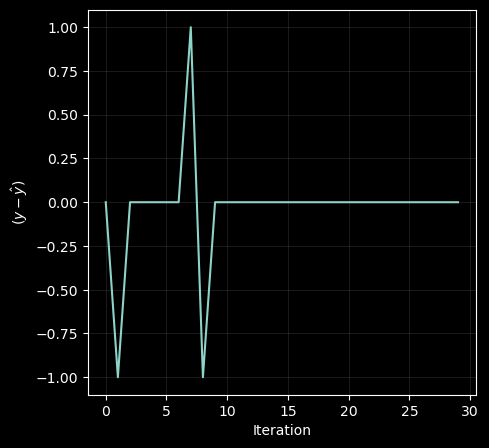

In [4]:
X = np.array([[1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])

y = np.array([0,1,1,1])

Perceptron = PerceptronEstimator(30,10)
Perceptron.fit(X,y) 

for index, x in enumerate(X):
    p = Perceptron.predict(x)
    print("{}: {} -> {}".format(x, y[index], p))
        
Perceptron.plot()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Perceptron

X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, random_state=3)
X.shape, y.shape

((100, 2), (100,))

In [6]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

s = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, s), np.arange(y_min, y_max, s))

Perceptron = Perceptron(random_state=42, max_iter=1000)
Perceptron.fit(X, y)

Perceptron(random_state=42)

In [7]:
Prediction = Perceptron.predict(np.c_[xx.ravel(), yy.ravel()]) 

In [8]:
Prediction = Prediction.reshape(xx.shape)
Prediction

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

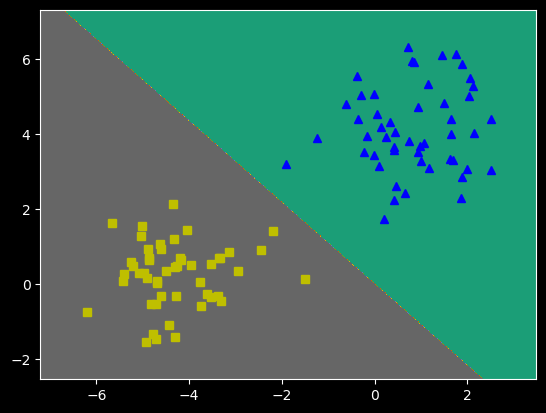

In [9]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'b^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ys')
plt.contourf(xx, yy, Prediction, cmap=plt.cm.Dark2);

In [10]:
a, b = np.meshgrid([1,2,3],
                   [4,
                    5,
                    6])
a, b

(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]]))

In [11]:
for i, j in zip(a, b):
    for k, l in zip(i, j):
        print(k, l)

1 4
2 4
3 4
1 5
2 5
3 5
1 6
2 6
3 6


In [12]:
tuple(print(k, l) for i, j in zip(a, b) for k, l in zip(i, j));

1 4
2 4
3 4
1 5
2 5
3 5
1 6
2 6
3 6


In [13]:
np.c_[a.ravel(), b.ravel()]

array([[1, 4],
       [2, 4],
       [3, 4],
       [1, 5],
       [2, 5],
       [3, 5],
       [1, 6],
       [2, 6],
       [3, 6]])

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels

In [15]:
class AdalineEstimator(BaseEstimator, ClassifierMixin):
    def __init__(self, eta=.001, n_iterations=500, random_state=None):
        self.n_iterations = n_iterations
        self.random_state = random_state        
        self.errors = []    
        self.eta = eta
        self.w = []
        self.wAll = []
        
        activation = lambda self, x: x @ self.w
        output = lambda self, x: 1 if self.activation(x) >= .0 else -1
        
    def fit(self, X=None, y=None):
        random_state = check_random_state(self.random_state)
        self.w = random_state.random_sample(np.size(X,1))
        X, y = check_X_y(X, y)
        self.X_ = X  #might aswell save the data inside of the class instance
        self.y_ = y 

        for i in range(self.n_iterations):
            rand_index = random_state.randint(0,np.size(X,0)) 
            x_ = X[rand_index]
            y_ = y[rand_index]
            s = x_ @ self.w
            error = (y_ - s)**2
            self.errors.append(error)
            self.w += self.eta * x_ * (y_ - s)
            self.wAll.append(self.w.copy())

    def predict(self, x):
        check_is_fitted(self, ['X_', 'y_'])
        return self.output(x)

    def plot(self):
        x1 = []
        x2 = []
        colors = []

        for i in range(self.X_.shape[0]):
            x1.append(self.X_[i][1])
            x2.append(self.X_[i][2])
            y = self.y_[i]

            if y == 1:
                colors.append('r')
            else:
                colors.append('b')
            
        plt.style.use('dark_background')
        
        plt.figure(1)
        plt.plot(self.errors)            
        plt.show()
        
        plt.figure(2)
        plt.scatter(x1, x2,c=colors)  
        # Result Line
        x1Line = np.linspace(0.0, 1.0, 2)
        x2Line = lambda x1, w0, w1, w2: (-x1 * w1 - w0) / w2;
        alpha = .0
        for idx, weight in enumerate(self.wAll):
            if(idx % 100 == 0):
                alpha = 1.
                plt.plot(x1Line, x2Line(x1Line,weight[0],weight[1],weight[2]),
                         alpha=alpha , linestyle='solid', label=str(idx), linewidth=1.5)      

        plt.plot(x1Line, x2Line(x1Line,weight[0],weight[1],weight[2]),
                 alpha=alpha , linestyle='solid', label=str(idx), linewidth=2.0)  
        plt.legend(loc='best', shadow=True)

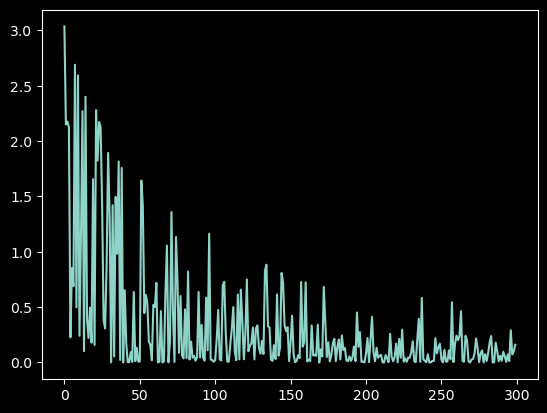

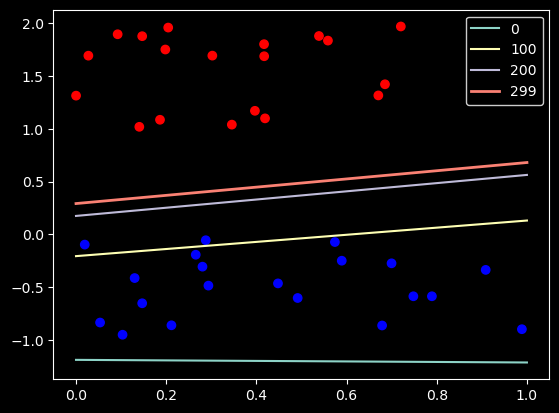

In [16]:
random_state = check_random_state(1)        
I = []
o = []

for g1 in random_state.random_sample(20):
    y = random_state.random_sample()
    I.append([1, g1, y+1.0]) # Falls +0.0, dann überlappende Kategorien
    o.append(1)

for g2 in random_state.random_sample(20):
    y = random_state.random_sample()
    I.append([1, g2, y-1.0]) # Falls +0.0, dann überlappende Kategorien
    o.append(-1)

X = np.array(I)
y = np.array(o)

Adaline = AdalineEstimator(eta=0.01,n_iterations=300, random_state=10)

Adaline.fit(X,y)
Adaline.plot()

In [17]:
# np.set_printoptions(precision=2)
# np.c_[X, y]

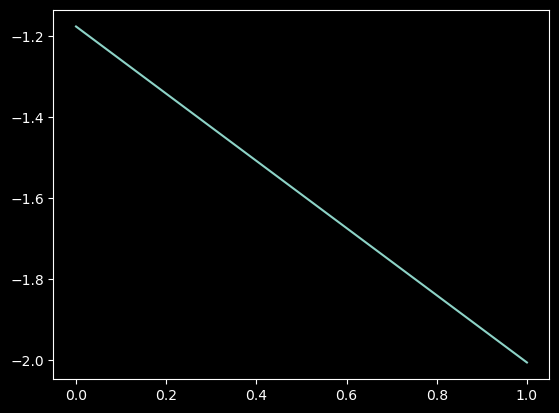

In [18]:
x2Line = lambda x1, y0, y1, y2: (-x1 * y1 - y0) / y2;
x1Line = np.linspace(0.0, 1.0, 2)
weight = random_state.random_sample(3)

plt.plot(x1Line, x2Line(x1Line,weight[0],weight[1],weight[2]))

In [19]:
x2Line(x1Line,weight[0],weight[1],weight[2])

array([-1.17626339, -2.00678272])